# Lloyd's Algorithm, and help methods 

In [615]:
import numpy as np
import random
import pandas as pd

def prev_not_current(prev_clusters, curr_clusters):
    for (x, y) in zip(prev_clusters, curr_clusters):
        if int(x)!=int(y):
            #print("Not the same: " ,x, y)
            return True
   # print(prev_clusters)
   # print(curr_clusters)
    
    return False    
    
def dist(x, y):
    dist=0
    for (a, b) in zip(x, y):
        dist+= (b-a)**2
    return dist 



def lloyds(clusters, points):
    iterations=0
    #cluster_membership=numpy.zeros(len(points))
    prev_membership=numpy.zeros(len(points))
    curr_membership=[numpy.argmin([dist(y,x) for y in clusters]) for x in points]

    
    while (iterations==0 or prev_not_current(prev_membership, curr_membership)):
        iterations+=1
        prev_membership=numpy.copy(curr_membership)
        curr_membership=[numpy.argmin([dist(y,x) for y in clusters]) for x in points]

        
        for index in range(len(clusters)):
            clusters[index]=np.mean([x for (x,y) in zip(points,curr_membership) if y==index], axis=0)
            

    cost=0
    for (point, membership) in zip(points, curr_membership):
        cost+=dist(point, clusters[membership])
        
        
        
    
    return curr_membership, clusters, cost




In [614]:
np.mean([(1,1), (2,2), (3,3)], axis=0)

array([2., 2.])

# The two initialization methods 

In [574]:
def k_random_init(points, k):
    clusters=numpy.empty((k, len(points[0])))
    samples=random.sample(range(len(points)), k)
    for (y, x) in zip(samples, range(k)):
        clusters[x]=points[y]
    return clusters   

def k_mean_plus(points, k):
    remaining_examples=points.copy()
    clusters=numpy.empty((k, len(points[0])))
    clusters[0]=random.choice(points)
    remaining_examples=np.array([x for x in remaining_examples if not np.array_equal(x, clusters[0])])
    
    for each in range(len(clusters)):
        if each>0:
            distances = [min([dist(y,x) for y in clusters[0:each]]) for x in remaining_examples]
            sum_d=sum(distances)
            distances=[x/sum_d for x in distances]
            clusters[each]=remaining_examples[numpy.random.choice(len(remaining_examples), 1, p=distances)]
        remaining_examples=np.array([x for x in remaining_examples if not np.array_equal(x, clusters[each])])

    return clusters


print(k_random_init(np.array([(1,1), (2,2), (3,3), (99,99)]), 2))

print(k_mean_plus(np.array([(1,1), (2,2), (3,3), (99,99)]), 2))

[[99. 99.]
 [ 1.  1.]]
[[99. 99.]
 [ 3.  3.]]


In [472]:
#testing
lloyds(k_random_init(np.array([(1,1), (2,2), (10,10), (99,99)]), 2), np.array([(1,1), (10,10), (3,3), (99,99)]))

[array([10, 10]), array([99, 99])]
[array([1, 1]), array([3, 3])]
Current cluster membership:  [1, 0, 1, 0]
Prev cluster membership:  [0. 0. 0. 0.]
Clusters [[54.5 54.5]
 [ 2.   2. ]]
Not the same:  0.0 1
[array([99, 99])]
[array([1, 1]), array([10, 10]), array([3, 3])]
Current cluster membership:  [1, 1, 1, 0]
Prev cluster membership:  [1 0 1 0]
Clusters [[99.         99.        ]
 [ 4.66666667  4.66666667]]
Not the same:  0 1
[array([99, 99])]
[array([1, 1]), array([10, 10]), array([3, 3])]
Current cluster membership:  [1, 1, 1, 0]
Prev cluster membership:  [1 1 1 0]
Clusters [[99.         99.        ]
 [ 4.66666667  4.66666667]]
[1 1 1 0]
[1, 1, 1, 0]


([1, 1, 1, 0], array([[99.        , 99.        ],
        [ 4.66666667,  4.66666667]]))

In [566]:
data1=numpy.genfromtxt('dataset1.csv', delimiter=' ')
data2=numpy.genfromtxt('dataset2.csv', delimiter=' ')

print(np.mean(data1, axis=0))



[-0.59187444 -0.27479869]
[[4.44064134 4.44064134 4.44064134]
 [6.46046278 6.46046278 6.46046278]] 2509891.8468501484


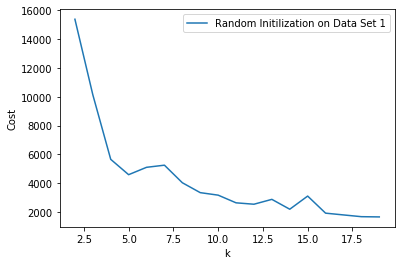

[15391.443729247825, 10140.806934374232, 5652.016703258076, 4585.089084531139, 5097.427284836926, 5245.307603613853, 4024.431964918889, 3336.143110254454, 3162.11021590861, 2628.6212060492335, 2531.4380847012553, 2869.3758629529134, 2183.6638525361877, 3097.9811253234607, 1910.2204020781105, 1787.087380560792, 1665.280358965267, 1648.8446462234403]
range(2, 20)


In [616]:
import matplotlib.pyplot as plt

x_axis=range(2, 20)
cost_1=[]
for k in range(2, 20):
    x,y, z1= lloyds(k_random_init(data1, k), data1)
    x,y, z2= lloyds(k_random_init(data1, k), data1)
    x,y, z3= lloyds(k_random_init(data1, k), data1)

    cost_1.append(min(z1,z2,z3))
plt.plot(x_axis, cost_1, label='Random Initilization on Data Set 1')


plt.xlabel('k')
plt.ylabel('Cost')
plt.legend()
plt.show()    
print(cost_1)
print(x_axis)

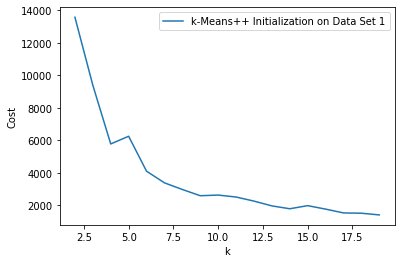

[13567.269902222453, 9383.907139766545, 5770.83602684777, 6244.441482969693, 4094.183897759899, 3377.8976831538716, 2968.743189052809, 2585.5409938807506, 2624.6715039590836, 2505.481907663876, 2253.685306371649, 1959.4656451265394, 1782.96122737505, 1973.92446064538, 1761.1536363264288, 1526.7471154477955, 1508.6752525609395, 1403.9329892101823]
range(2, 20)


In [617]:
import matplotlib.pyplot as plt

x_axis=range(2, 20)
cost_1=[]
for k in range(2, 20):
    x,y, z1= lloyds(k_mean_plus(data1, k), data1)
    x,y, z2= lloyds(k_mean_plus(data1, k), data1)
    x,y, z3= lloyds(k_mean_plus(data1, k), data1)
    cost_1.append(min(z1, z2, z3))
plt.plot(x_axis, cost_1, label='k-Means++ Initialization on Data Set 1')


plt.xlabel('k')
plt.ylabel('Cost')
plt.legend()
plt.show()    
print(cost_1)
print(x_axis)

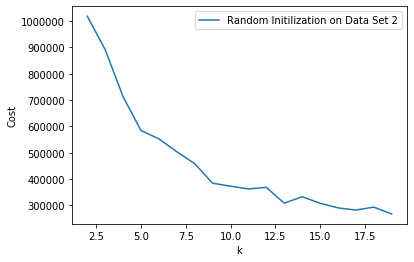

[1018101.7095393627, 891271.4714790918, 712356.4231141404, 584246.3044128738, 552568.1134989946, 503668.5968263136, 458450.0012428802, 384241.4202678071, 372932.4167618812, 362438.64155658823, 368587.1220231094, 308397.8329948088, 332852.6583573013, 308223.24911661167, 290717.9154864838, 282205.94419635396, 293408.86358246836, 267649.82481756055]
range(2, 20)


In [618]:
import matplotlib.pyplot as plt

x_axis=range(2, 20)
cost_1=[]
for k in range(2, 20):
    x,y, z1= lloyds(k_random_init(data2, k), data2)
    x,y, z2= lloyds(k_random_init(data2, k), data2)
    x,y, z3= lloyds(k_random_init(data2, k), data2)

    cost_1.append(min(z1, z2, z3))
plt.plot(x_axis, cost_1, label='Random Initilization on Data Set 2')


plt.xlabel('k')
plt.ylabel('Cost')
plt.legend()
plt.show()    
print(cost_1)
print(x_axis)

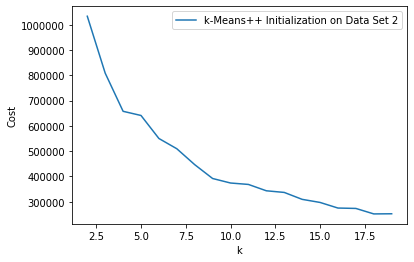

[1033294.2496718979, 808315.1059550701, 657420.6607612573, 640928.5006095876, 549909.0381846168, 509393.26304894674, 446481.08495554957, 391728.04088917456, 373907.3369493159, 368255.0540225177, 343176.1839992913, 336681.88800946396, 309315.7958358215, 297089.6320651172, 274923.43531848135, 273388.13112205965, 251710.8870130969, 252287.67219310952]
range(2, 20)


In [619]:
import matplotlib.pyplot as plt

x_axis=range(2, 20)
cost_1=[]
for k in range(2, 20):
    x,y, z1= lloyds(k_mean_plus(data2, k), data2)
    x,y, z2= lloyds(k_mean_plus(data2, k), data2)
    x,y, z3= lloyds(k_mean_plus(data2, k), data2)
    cost_1.append(min(z1, z2, z3))
plt.plot(x_axis, cost_1, label='k-Means++ Initialization on Data Set 2')


plt.xlabel('k')
plt.ylabel('Cost')
plt.legend()
plt.show()    
print(cost_1)
print(x_axis)

# Below is for Hierarchical Clustering

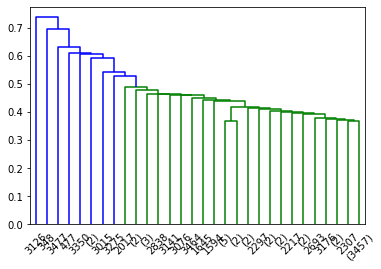

In [611]:
Z = hierarchy.linkage(data1, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z, truncate_mode='lastp')

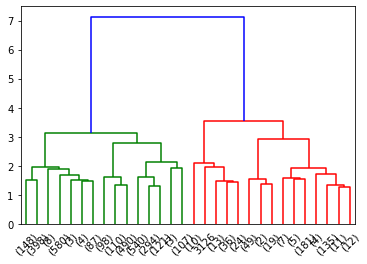

In [607]:
Z = hierarchy.linkage(data1, 'average')
plt.figure()
dn = hierarchy.dendrogram(Z, truncate_mode='lastp')

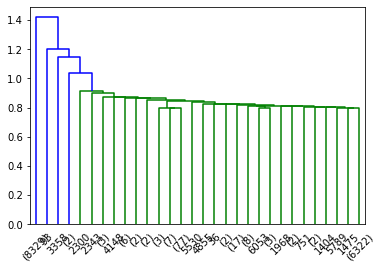

In [608]:
Z = hierarchy.linkage(data2, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z, truncate_mode='lastp')

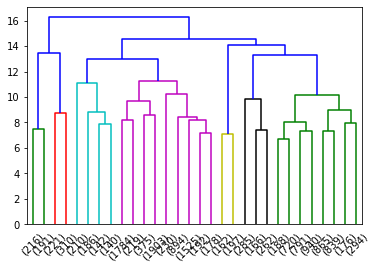

In [609]:
Z = hierarchy.linkage(data2, 'average')
plt.figure()
dn = hierarchy.dendrogram(Z, truncate_mode='lastp')